<a href="https://colab.research.google.com/github/chansek03/water_potability/blob/main/Water_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Read the CSV file
data = pd.read_csv("/content/water_potability.csv")

# View the first 5 rows
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
#mean of columns
data.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [5]:
data['ph'].fillna(data['ph'].mean(),inplace=True)
data['Sulfate'].fillna(data['Sulfate'].mean(),inplace=True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(),inplace=True)
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


In [6]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
print(data.size)
print(data.shape)

32760
(3276, 10)


In [8]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Count the number of zeros (non-potable) and ones (potable) in the original dataset
count_before_smote = y.value_counts()

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the number of zeros and ones in the resampled dataset
count_after_smote = pd.Series(y_resampled).value_counts()

print("Original Dataset (Before SMOTE):")
print(count_before_smote)

print("\nResampled Dataset (After SMOTE):")
print(count_after_smote)

Original Dataset (Before SMOTE):
0    1998
1    1278
Name: Potability, dtype: int64

Resampled Dataset (After SMOTE):
0    1998
1    1998
Name: Potability, dtype: int64


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Split the dataset into features (X) and target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel= 'rbf', gamma= 'scale', C= 10)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")



Accuracy: 0.6265243902439024
Confusion Matrix:
[[411   1]
 [244   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("Best model's accuracy on the test set:", accuracy)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best model's accuracy on the test set: 0.6814024390243902


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a grid of hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("Best model's accuracy on the test set:", accuracy)


Best hyperparameters: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best model's accuracy on the test set: 0.5655487804878049


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression()

# Define a grid of hyperparameters to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("Best model's accuracy on the test set:", accuracy)


Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best model's accuracy on the test set: 0.6280487804878049


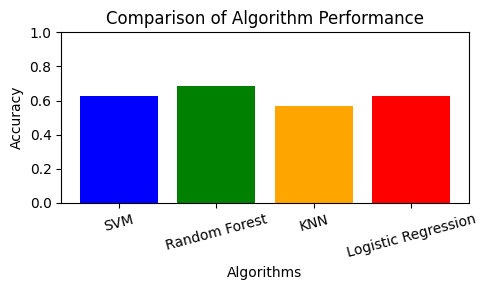

In [13]:
import matplotlib.pyplot as plt
classifiers = {
    'SVM': SVC(kernel= 'rbf', gamma= 'scale', C= 10),
    'Random Forest': RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100),
    'KNN': KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform'),
    'Logistic Regression': LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
}

results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Create a bar plot to compare the results
plt.figure(figsize=(5, 3))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Performance')
plt.ylim(0, 1.0)
plt.xticks(rotation=15)
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score



# Split the dataset into features (X) and target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual classifiers
svm_classifier = SVC(kernel= 'rbf', gamma= 'scale', C= 10, probability=True)
rf_classifier = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform')
lr_classifier = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')


# Create a VotingClassifier for ensemble
ensemble_classifier = VotingClassifier(
    estimators=[
        ('SVM', svm_classifier),
        ('Random Forest', rf_classifier),
        ('KNN', knn_classifier),
        ('Logistic Regression', lr_classifier)
    ],
    voting='soft'  # Use soft voting for probability-based prediction
)

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Accuracy: 0.6432926829268293


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score



# Split the dataset into features (X) and target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual classifiers
svm_classifier = SVC(kernel= 'rbf', gamma= 'scale', C= 10, probability=True)
knn_classifier = KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform')
lr_classifier = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')

# Create a VotingClassifier for the first-level ensemble
ensemble_classifier = VotingClassifier(
    estimators=[
        ('SVM', svm_classifier),
        ('KNN', knn_classifier),
        ('Logistic Regression', lr_classifier)
    ],
    voting='soft'  # Use soft voting for probability-based prediction
)

# Create the Random Forest meta-learner
meta_learner = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)

# Train the ensemble classifiers on the training data
ensemble_classifier.fit(X_train, y_train)
meta_learner.fit(X_train, y_train)

# Make predictions on the test set using base classifiers
base_predictions = ensemble_classifier.predict(X_test)

# Make predictions on the test set using the Random Forest meta-learner
meta_predictions = meta_learner.predict(X_test)

# Calculate the accuracy score of the ensemble (meta-learner) predictions
accuracy = accuracy_score(y_test, meta_predictions)
print(f"Meta-Learner (Random Forest) Accuracy: {accuracy}")


Meta-Learner (Random Forest) Accuracy: 0.6814024390243902


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score



# Split the dataset into features (X) and target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Define a grid of hyperparameters to search over
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]  # Example values for the alpha parameter
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_nb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("Best model's accuracy on the test set:", accuracy)


Best hyperparameters: {'alpha': 0.1}
Best model's accuracy on the test set: 0.5167682926829268


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score



# Split the dataset into features (X) and target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Quadratic Discriminant Analysis classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Define a grid of hyperparameters to search over
param_grid = {
    'reg_param': [0.0, 0.1, 0.2, 0.3],  # Regularization parameter (shrinkage)
    'priors': [None, [0.5, 0.5], [0.6, 0.4], [0.7, 0.3]]  # Class priors
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=qda_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_qda_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_qda_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("Best model's accuracy on the test set:", accuracy)


Best hyperparameters: {'priors': [0.6, 0.4], 'reg_param': 0.1}
Best model's accuracy on the test set: 0.6890243902439024


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of hyperparameters to search over (e.g., for RBF kernel length scale and constant)
param_grid = {
    'kernel': [C(1.0, (1e-1, 1e3)) * RBF(1.0, (1e-2, 1e2))],
}

best_accuracy = 0
best_model = None

# Perform a grid search over the specified hyperparameter range
for kernel in param_grid['kernel']:
    gp_classifier = GaussianProcessClassifier(kernel=kernel)
    gp_classifier.fit(X_train, y_train)
    y_pred = gp_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = gp_classifier

print("Best accuracy:", best_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best accuracy: 0.6158536585365854


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define a grid of hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("Best model's accuracy on the test set:", accuracy)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best model's accuracy on the test set: 0.6067073170731707


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score




X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual classifiers
svm_classifier = SVC(kernel= 'rbf', gamma= 'scale', C= 10, probability=True)
rf_classifier = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform')
lr_classifier = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
gp_classifier = GaussianProcessClassifier()
qda_classifier = QuadraticDiscriminantAnalysis(priors= [0.6, 0.4], reg_param= 0.1)
nb_classifier = MultinomialNB(alpha= 0.1)
dt_classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)

# Create a VotingClassifier for the ensemble
ensemble_classifier = VotingClassifier(
    estimators=[
        ('SVM', svm_classifier),
        ('Random Forest', rf_classifier),
        ('KNN', knn_classifier),
        ('Logistic Regression', lr_classifier),
        ('Gaussian Process', gp_classifier),
        ('Quadratic Discriminant', qda_classifier),
        ('Naive Bayes', nb_classifier),
        ('Decision Tree', dt_classifier),
    ],
    voting='soft'  # Use hard voting for majority voting
)

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_classifier.predict(X_test)

# Calculate the accuracy score of the ensemble
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Accuracy: 0.6448170731707317


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base classifiers
base_classifiers = [
    ('SVM', SVC(kernel= 'rbf', gamma= 'scale', C= 10, probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform')),
    ('Logistic Regression',LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')),
    ('Gaussian Process', GaussianProcessClassifier()),
    ('Quadratic Discriminant',QuadraticDiscriminantAnalysis(priors= [0.6, 0.4], reg_param= 0.1) ),
    ('Naive Bayes', MultinomialNB(alpha= 0.1)),
    ('Decision Tree', DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)),
    ('Random forest', RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42))
]

# Create a VotingClassifier for the base classifiers
ensemble_classifier = VotingClassifier(
    estimators=base_classifiers,
    voting='soft'  # Use soft voting for probability-based prediction
)

# Create the Random Forest classifier as the meta-learner
meta_learner = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)

# Combine the base classifiers and the meta-learner in a VotingClassifier
final_classifier = VotingClassifier(
    estimators=[
        ('Ensemble', ensemble_classifier),
        ('Random Forest', meta_learner)
    ],
    voting='soft'
)

# Train the ensemble classifier on the training data
final_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble with Random Forest as Meta-Learner Accuracy: {accuracy}")


Ensemble with Random Forest as Meta-Learner Accuracy: 0.6920731707317073


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base classifiers
base_classifiers = [
    ('SVM', SVC(kernel= 'rbf', gamma= 'scale', C= 10, probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform')),
    ('Logistic Regression',LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')),
    ('Gaussian Process', GaussianProcessClassifier()),
    ('Quadratic Discriminant',QuadraticDiscriminantAnalysis(priors= [0.6, 0.4], reg_param= 0.1) ),
    ('Naive Bayes', MultinomialNB(alpha= 0.1)),
    ('Decision Tree', DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)),
    ('Random forest', RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42))
]

# Create a VotingClassifier for the base classifiers
ensemble_classifier = VotingClassifier(
    estimators=base_classifiers,
    voting='soft'  # Use soft voting for probability-based prediction
)

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Get the initial ensemble accuracy
initial_accuracy = accuracy_score(y_test, ensemble_classifier.predict(X_test))

# Create a list to store the names of the worst models
worst_models = []

# Initialize variables to keep track of the worst models and their corresponding accuracies
worst_model_names = []
worst_model_accuracies = []

# Calculate the accuracy of each base classifier
for name, classifier in base_classifiers:
    classifier.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, classifier.predict(X_test))
    worst_model_names.append(name)
    worst_model_accuracies.append(accuracy)

# Sort the models by accuracy and find the worst 4 models

sorted_models = sorted(zip(worst_model_names, worst_model_accuracies), key=lambda x: x[1])
worst_models = [model[0] for model in sorted_models[:5]]

# Remove the worst models from the ensemble
pruned_base_classifiers = [(name, classifier) for name, classifier in base_classifiers if name not in worst_models]


# Create a new VotingClassifier without the worst models
pruned_ensemble_classifier = VotingClassifier(
    estimators=pruned_base_classifiers,
    voting='soft'
)

# Train the pruned ensemble on the training data
pruned_ensemble_classifier.fit(X_train, y_train)

# Get the improved accuracy of the pruned ensemble
improved_accuracy = accuracy_score(y_test, pruned_ensemble_classifier.predict(X_test))

print(f"Initial Ensemble Accuracy: {initial_accuracy}")
print(f"Worst Models Removed: {worst_models}")
print(f"Improved Ensemble Accuracy: {improved_accuracy}")


Initial Ensemble Accuracy: 0.6448170731707317
Worst Models Removed: ['Naive Bayes', 'KNN', 'Decision Tree', 'Gaussian Process', 'SVM']
Improved Ensemble Accuracy: 0.6920731707317073


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import sys


# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary of model names and corresponding model instances
models = {
    'SVM': SVC(kernel= 'rbf', gamma= 'scale', C= 10, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform'),
    'Logistic Regression':LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear'),
    'Gaussian Process': GaussianProcessClassifier(),
    'Quadratic Discriminant':QuadraticDiscriminantAnalysis(priors= [0.6, 0.4], reg_param= 0.1),
    'Naive Bayes': MultinomialNB(alpha= 0.1),
    'Decision Tree': DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10),
    'Random forest': RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)

}

# Initialize dictionaries to store accuracy, time, and space complexity information
accuracy_ranking = {}
time_complexity_ranking = {}
space_complexity_ranking = {}

# Iterate through the models and evaluate them
for model_name, model in models.items():
    # Evaluate accuracy
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    execution_time = end_time - start_time

    # Evaluate space complexity using sys.getsizeof
    memory_usage = sys.getsizeof(model)

    accuracy_ranking[model_name] = accuracy
    time_complexity_ranking[model_name] = execution_time
    space_complexity_ranking[model_name] = memory_usage

# Rank models based on accuracy (higher is better)
accuracy_ranking = {k: v for k, v in sorted(accuracy_ranking.items(), key=lambda item: item[1], reverse=True)}

# Rank models based on time complexity (lower is better)
time_complexity_ranking = {k: v for k, v in sorted(time_complexity_ranking.items(), key=lambda item: item[1])}

# Rank models based on space complexity (lower is better)
space_complexity_ranking = {k: v for k, v in sorted(space_complexity_ranking.items(), key=lambda item: item[1])}

# Print the rankings
print("Ranking based on Accuracy:")
for idx, (model_name, accuracy) in enumerate(accuracy_ranking.items(), 1):
    print(f"{idx}. {model_name}: {accuracy:.4f}")

print("\nRanking based on Time Complexity:")
for idx, (model_name, time_complexity) in enumerate(time_complexity_ranking.items(), 1):
    print(f"{idx}. {model_name}: {time_complexity:.6f} seconds")

print("\nRanking based on Space Complexity:")
for idx, (model_name, space_complexity) in enumerate(space_complexity_ranking.items(), 1):
    print(f"{idx}. {model_name}: {space_complexity} bytes")


Ranking based on Accuracy:
1. Quadratic Discriminant: 0.6890
2. Random forest: 0.6814
3. Logistic Regression: 0.6280
4. SVM: 0.6265
5. Gaussian Process: 0.6159
6. Decision Tree: 0.6098
7. KNN: 0.5655
8. Naive Bayes: 0.5168

Ranking based on Time Complexity:
1. Naive Bayes: 0.006575 seconds
2. Quadratic Discriminant: 0.008027 seconds
3. Logistic Regression: 0.014878 seconds
4. Decision Tree: 0.037761 seconds
5. KNN: 0.038547 seconds
6. Random forest: 1.038873 seconds
7. SVM: 4.722041 seconds
8. Gaussian Process: 5.929552 seconds

Ranking based on Space Complexity:
1. SVM: 48 bytes
2. KNN: 48 bytes
3. Logistic Regression: 48 bytes
4. Gaussian Process: 48 bytes
5. Quadratic Discriminant: 48 bytes
6. Naive Bayes: 48 bytes
7. Decision Tree: 48 bytes
8. Random forest: 48 bytes


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import sys

# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base classifiers
base_classifiers = [
    ('SVM', SVC(kernel= 'rbf', gamma= 'scale', C= 10, probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform')),
    ('Logistic Regression',LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')),
    ('Gaussian Process', GaussianProcessClassifier()),
    ('Quadratic Discriminant',QuadraticDiscriminantAnalysis(priors= [0.6, 0.4], reg_param= 0.1) ),
    ('Naive Bayes', MultinomialNB(alpha= 0.1)),
    ('Decision Tree', DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)),
    ('Random forest', RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42))
]

# Create a VotingClassifier for the base classifiers
ensemble_classifier = VotingClassifier(
    estimators=base_classifiers,
    voting='soft'  # Use soft voting for probability-based prediction
)

# Initialize dictionaries to store accuracy, time, and space complexity information
accuracy_ranking = {}
time_complexity_ranking = {}
space_complexity_ranking = {}

# Train the ensemble classifier on the training data
start_time = time.time()
ensemble_classifier.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Evaluate accuracy
y_pred = ensemble_classifier.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)

# Evaluate space complexity using sys.getsizeof
memory_usage = sys.getsizeof(ensemble_classifier)

accuracy_ranking['Ensemble'] = initial_accuracy
time_complexity_ranking['Ensemble'] = execution_time
space_complexity_ranking['Ensemble'] = memory_usage

# Rank models based on accuracy (higher is better)
accuracy_ranking = {k: v for k, v in sorted(accuracy_ranking.items(), key=lambda item: item[1], reverse=True)}

# Rank models based on time complexity (lower is better)
time_complexity_ranking = {k: v for k, v in sorted(time_complexity_ranking.items(), key=lambda item: item[1])}

# Rank models based on space complexity (lower is better)
space_complexity_ranking = {k: v for k, v in sorted(space_complexity_ranking.items(), key=lambda item: item[1])}

# Identify the 5 models with the least accuracies and remove them
# You can customize the criteria for model removal
num_models_to_remove = 5
worst_models = []

# Evaluate and remove the worst models
for model_name, model in base_classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    worst_models.append((model_name, accuracy))

worst_models.sort(key=lambda x: x[1])
worst_models = worst_models[:num_models_to_remove]

# Remove the worst models from the ensemble
for model_name, _ in worst_models:
    for idx, (base_model_name, _) in enumerate(ensemble_classifier.estimators):
        if base_model_name == model_name:
            del ensemble_classifier.estimators[idx]
            break

# Train the pruned ensemble on the training data
start_time = time.time()
ensemble_classifier.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Evaluate accuracy after pruning
y_pred = ensemble_classifier.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pred)

# Evaluate space complexity after pruning
pruned_memory_usage = sys.getsizeof(ensemble_classifier)

# Print the rankings and removed model names
print("Ranking based on Accuracy:")
for idx, (model_name, accuracy) in enumerate(accuracy_ranking.items(), 1):
    print(f"{idx}. {model_name}: {accuracy:.4f}")

print("\nRanking based on Time Complexity:")
for idx, (model_name, time_complexity) in enumerate(time_complexity_ranking.items(), 1):
    print(f"{idx}. {model_name}: {time_complexity:.6f} seconds")

print("\nRanking based on Space Complexity:")
for idx, (model_name, space_complexity) in enumerate(space_complexity_ranking.items(), 1):
    print(f"{idx}. {model_name}: {space_complexity} bytes")

print("\nRemoved Model Names:")
for idx, (model_name, _) in enumerate(worst_models, 1):
    print(f"{idx}. {model_name}")

print(f"\nAccuracy after Pruning: {pruned_accuracy:.4f}")
print(f"Time Complexity after Pruning: {execution_time:.6f} seconds")
print(f"Space Complexity after Pruning: {pruned_memory_usage} bytes")


Ranking based on Accuracy:
1. Ensemble: 0.6463

Ranking based on Time Complexity:
1. Ensemble: 11.714863 seconds

Ranking based on Space Complexity:
1. Ensemble: 48 bytes

Removed Model Names:
1. Naive Bayes
2. KNN
3. Decision Tree
4. Gaussian Process
5. SVM

Accuracy after Pruning: 0.6921
Time Complexity after Pruning: 1.130996 seconds
Space Complexity after Pruning: 48 bytes


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base classifiers
base_classifiers = [

    ('Logistic Regression',LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')),

    ('Quadratic Discriminant',QuadraticDiscriminantAnalysis(priors= [0.6, 0.4], reg_param= 0.1) )

]

# Create a VotingClassifier for the base classifiers
ensemble_classifier = VotingClassifier(
    estimators=base_classifiers,
    voting='soft'  # Use soft voting for probability-based prediction
)

# Create the Random Forest classifier as the meta-learner
meta_learner = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)

# Combine the base classifiers and the meta-learner in a VotingClassifier
final_classifier = VotingClassifier(
    estimators=[
        ('Ensemble', ensemble_classifier),
        ('Random Forest', meta_learner)
    ],
    voting='soft'
)

# Train the ensemble classifier on the training data
final_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble with Random Forest as Meta-Learner Accuracy: {accuracy}")


Ensemble with Random Forest as Meta-Learner Accuracy: 0.6920731707317073


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score




X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual classifiers

lr_classifier = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')

qda_classifier = QuadraticDiscriminantAnalysis(priors= [0.6, 0.4], reg_param= 0.1)



# Create a VotingClassifier for the ensemble
ensemble_classifier = VotingClassifier(
    estimators=[


        ('Logistic Regression', lr_classifier),
        ('Quadratic Discriminant', qda_classifier),


    ],
    voting='soft'  # Use hard voting for majority voting
)

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_classifier.predict(X_test)

# Calculate the accuracy score of the ensemble
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Accuracy: 0.6814024390243902


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np



# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base classifiers
base_classifiers = [
    ('SVM', SVC(kernel= 'rbf', gamma= 'scale', C= 10, probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform')),
    ('Logistic Regression',LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')),
    ('Gaussian Process', GaussianProcessClassifier()),
    ('Quadratic Discriminant',QuadraticDiscriminantAnalysis(priors= [0.6, 0.4], reg_param= 0.1) ),
    ('Naive Bayes', MultinomialNB(alpha= 0.1)),
    ('Decision Tree', DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)),
    ('Random forest', RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42))
]

# Fit the base classifiers on the training data and calculate their individual accuracies
model_accuracies = {}
for name, classifier in base_classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

# Calculate the initial ensemble accuracy
ensemble_classifier = VotingClassifier(
    estimators=base_classifiers,
    voting='soft'
)
ensemble_classifier.fit(X_train, y_train)
y_pred_ensemble = ensemble_classifier.predict(X_test)
initial_ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

# Calculate the mean accuracy of all models
mean_accuracy = np.mean(list(model_accuracies.values()))

# Identify and remove the worst-performing models
removed_models = []
for name, accuracy in model_accuracies.items():
    if accuracy < mean_accuracy:
        removed_models.append(name)

# Create a new ensemble without the removed models
pruned_base_classifiers = [(name, classifier) for name, classifier in base_classifiers if name not in removed_models]
pruned_ensemble_classifier = VotingClassifier(
    estimators=pruned_base_classifiers,
    voting='soft'
)
pruned_ensemble_classifier.fit(X_train, y_train)

# Calculate the final improved ensemble accuracy
y_pred_pruned_ensemble = pruned_ensemble_classifier.predict(X_test)
final_ensemble_accuracy = accuracy_score(y_test, y_pred_pruned_ensemble)

print(f"Initial Ensemble Accuracy: {initial_ensemble_accuracy}")
print(f"Removed Models: {removed_models}")
print(f"Final Improved Ensemble Accuracy: {final_ensemble_accuracy}")


Initial Ensemble Accuracy: 0.6448170731707317
Removed Models: ['KNN', 'Gaussian Process', 'Naive Bayes', 'Decision Tree']
Final Improved Ensemble Accuracy: 0.6844512195121951


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time


# Split the dataset into features (X) and the target variable (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base classifiers
base_classifiers = [
    ('SVM', SVC(kernel= 'rbf', gamma= 'scale', C= 10, probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors= 11, p= 2, weights= 'uniform')),
    ('Logistic Regression',LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')),
    ('Gaussian Process', GaussianProcessClassifier()),
    ('Quadratic Discriminant',QuadraticDiscriminantAnalysis(priors= [0.6, 0.4], reg_param= 0.1) ),
    ('Naive Bayes', MultinomialNB(alpha= 0.1)),
    ('Decision Tree', DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)),
    ('Random forest', RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42))
]

# Create a VotingClassifier for the base classifiers
ensemble_classifier = VotingClassifier(
    estimators=base_classifiers,
    voting='soft'  # Use soft voting for probability-based prediction
)

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Measure the time taken by each model to make predictions
times = []
for name, classifier in base_classifiers:
    start_time = time.time()
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

# Evaluate the initial ensemble accuracy
initial_accuracy = accuracy_score(y_test, ensemble_classifier.predict(X_test))

# Calculate the mean time complexity
mean_time_complexity = sum(times) / len(times)
# Calculate the mean accuracy of all models
mean_accuracy = np.mean(list(model_accuracies.values()))
# Initialize lists for new classifiers and removed models
new_base_classifiers = []
removed_models = []

# Check models for removal
for name, classifier in base_classifiers:
    model_accuracy = accuracy_score(y_test, classifier.predict(X_test))
    model_time_complexity = times[base_classifiers.index((name, classifier))]

    if model_accuracy >= mean_accuracy and model_time_complexity <= mean_time_complexity:
        new_base_classifiers.append((name, classifier))
    else:
        removed_models.append(name)

# Create a new ensemble without the worst-performing models
pruned_ensemble_classifier = VotingClassifier(
    estimators=new_base_classifiers,
    voting='soft'
)

# Train the pruned ensemble on the training data
pruned_ensemble_classifier.fit(X_train, y_train)

# Make predictions on the test set with the pruned ensemble
y_pred = pruned_ensemble_classifier.predict(X_test)

# Calculate the final improved accuracy
final_accuracy = accuracy_score(y_test, y_pred)

# Print the initial ensemble accuracy, removed models, and final improved accuracy
print(f"Initial Ensemble Accuracy: {initial_accuracy}")
print(f"Removed Models: {removed_models}")
print(f"Final Improved Accuracy: {final_accuracy}")


Initial Ensemble Accuracy: 0.6463414634146342
Removed Models: ['SVM', 'KNN', 'Gaussian Process', 'Naive Bayes', 'Decision Tree']
Final Improved Accuracy: 0.6920731707317073
